In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/promo_order_data.csv')
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trans_date       2485 non-null   object 
 1   trans_hour       2485 non-null   int64  
 2   customers        2485 non-null   float64
 3   vendors          2485 non-null   float64
 4   orders           2485 non-null   float64
 5   amount           2485 non-null   float64
 6   promo_count      2485 non-null   float64
 7   promo_amount     0 non-null      float64
 8   Android          2455 non-null   float64
 9   GCF              2455 non-null   float64
 10  Macintosh        2455 non-null   float64
 11  Tablet           2455 non-null   float64
 12  Windows          2455 non-null   float64
 13  X11              2455 non-null   float64
 14  iPhone           2455 non-null   float64
 15  Blacklisted      2485 non-null   float64
 16  Not Blacklisted  2485 non-null   float64
dtypes: float64(15)

In [ ]:
df.isna().sum()

trans_date            0
trans_hour            0
customers             0
vendors               0
orders                0
amount                0
promo_count           0
promo_amount       2485
Android              30
GCF                  30
Macintosh            30
Tablet               30
Windows              30
X11                  30
iPhone               30
Blacklisted           0
Not Blacklisted       0
dtype: int64

In [ ]:
# drop promo_amount column
df.drop(columns=['promo_amount'], inplace = True)

In [ ]:
# drop rows with null values
df.dropna(axis=0, inplace=True)

In [ ]:
df.isna().sum()

trans_date         0
trans_hour         0
customers          0
vendors            0
orders             0
amount             0
promo_count        0
Android            0
GCF                0
Macintosh          0
Tablet             0
Windows            0
X11                0
iPhone             0
Blacklisted        0
Not Blacklisted    0
dtype: int64

In [ ]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


In [ ]:
df['trans_date']=pd.to_datetime(df['trans_date'])

In [ ]:
df['weekday'] = df['trans_date'].dt.weekday
df['is_weekend'] = df['weekday'].map({0:0,1:0,2:0,3:0,4:0,5:1,6:1})
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted,weekday,is_weekend
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0,4,0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0,4,0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0,4,0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0,4,0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0,4,0


Data Profiling

<Axes: xlabel='trans_hour', ylabel='customers'>

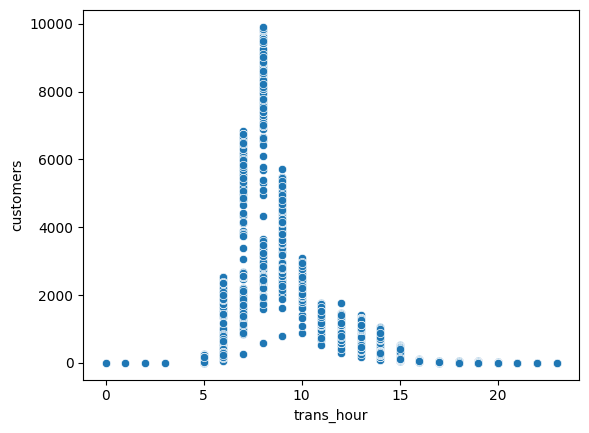

In [ ]:
sns.scatterplot(data=df, x="trans_hour", y="customers")

<Axes: xlabel='trans_hour', ylabel='orders'>

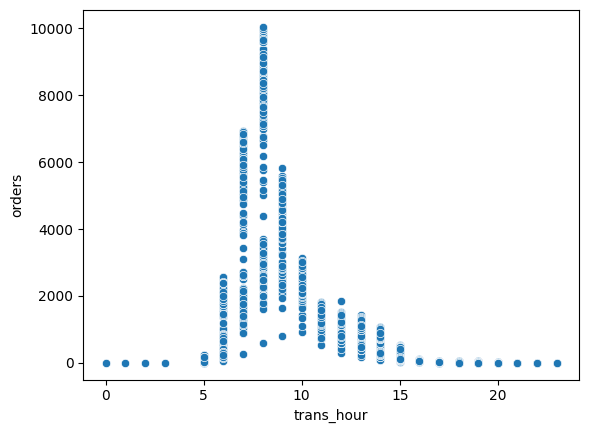

In [ ]:
sns.scatterplot(data=df, x="trans_hour", y="orders")

<Axes: xlabel='trans_hour', ylabel='amount'>

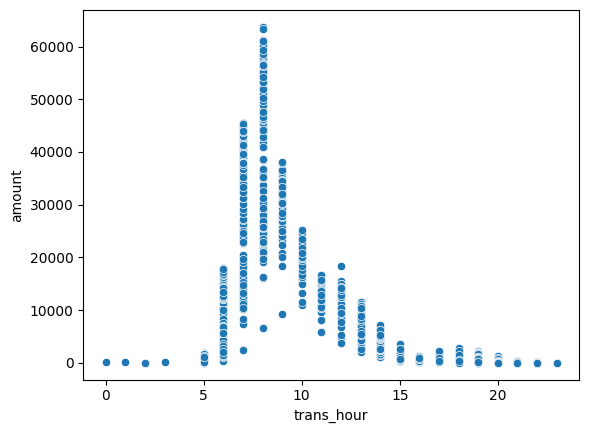

In [ ]:
sns.scatterplot(data=df, x="trans_hour", y="amount")

In [ ]:
from sklearn.datasets import make_blobs
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=25)

In [ ]:
sns.set(rc={"figure.figsize":(10,8)})

<ipython-input-33-a720d312d140>:1: UserWarning: The palette list has more values (25) than needed (23), which may not be intended.
  sns.scatterplot(data=df, x="promo_count", y="customers", hue='trans_hour',palette=palette)


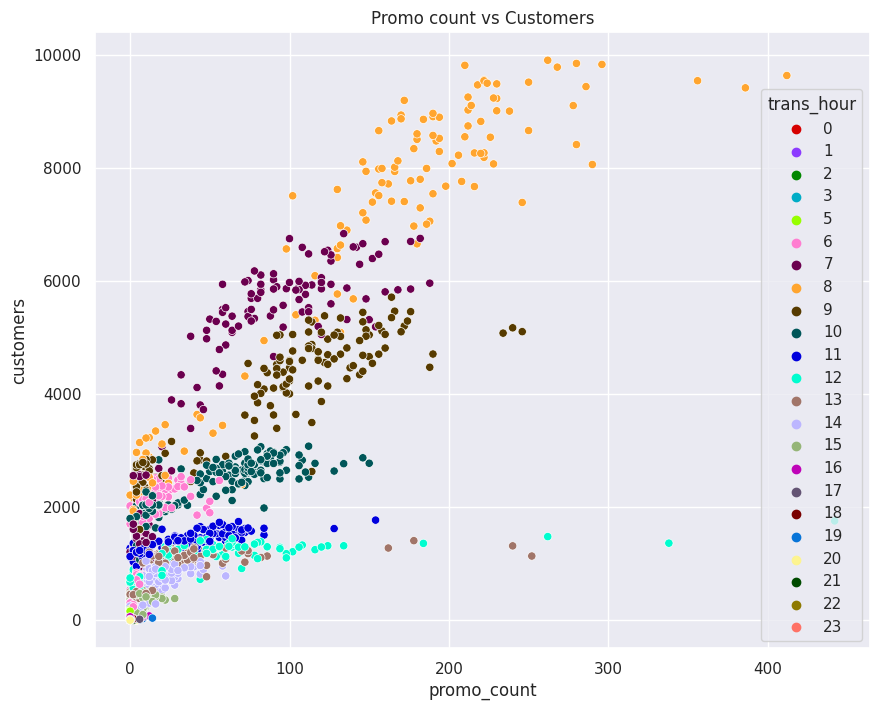

In [ ]:
sns.scatterplot(data=df, x="promo_count", y="customers", hue='trans_hour',palette=palette)
plt.title('Promo count vs Customers')
plt.show()

<ipython-input-34-3bd9b02c52dc>:1: UserWarning: The palette list has more values (25) than needed (23), which may not be intended.
  sns.scatterplot(data=df, x="promo_count", y="vendors", hue='trans_hour',palette=palette)


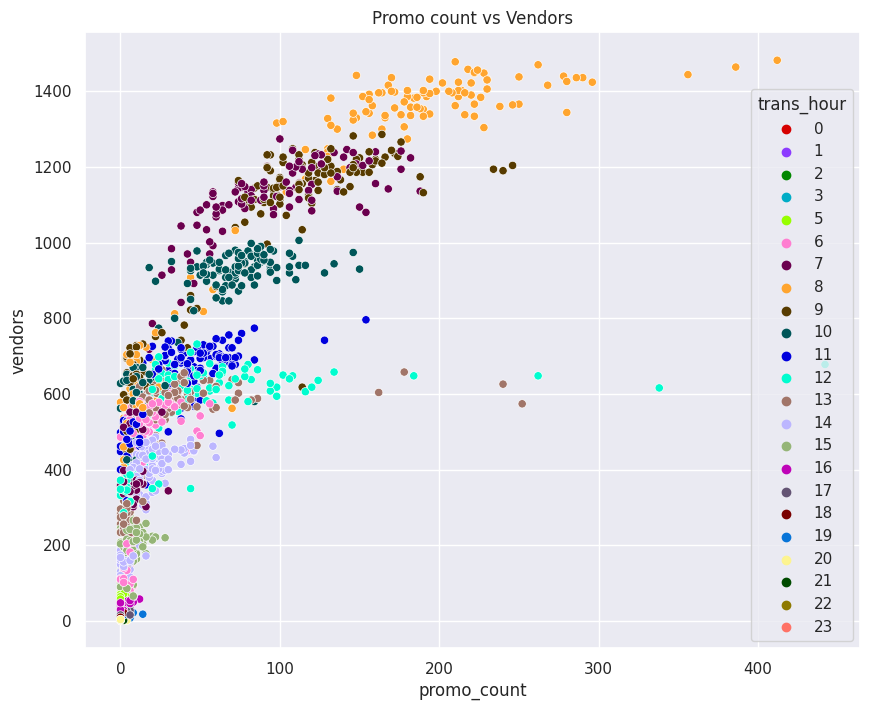

In [ ]:
sns.scatterplot(data=df, x="promo_count", y="vendors", hue='trans_hour',palette=palette)
plt.title('Promo count vs Vendors')
plt.show()

<ipython-input-35-a07b09f03850>:1: UserWarning: The palette list has more values (25) than needed (23), which may not be intended.
  sns.scatterplot(data=df, x="promo_count", y="orders", hue='trans_hour',palette=palette)


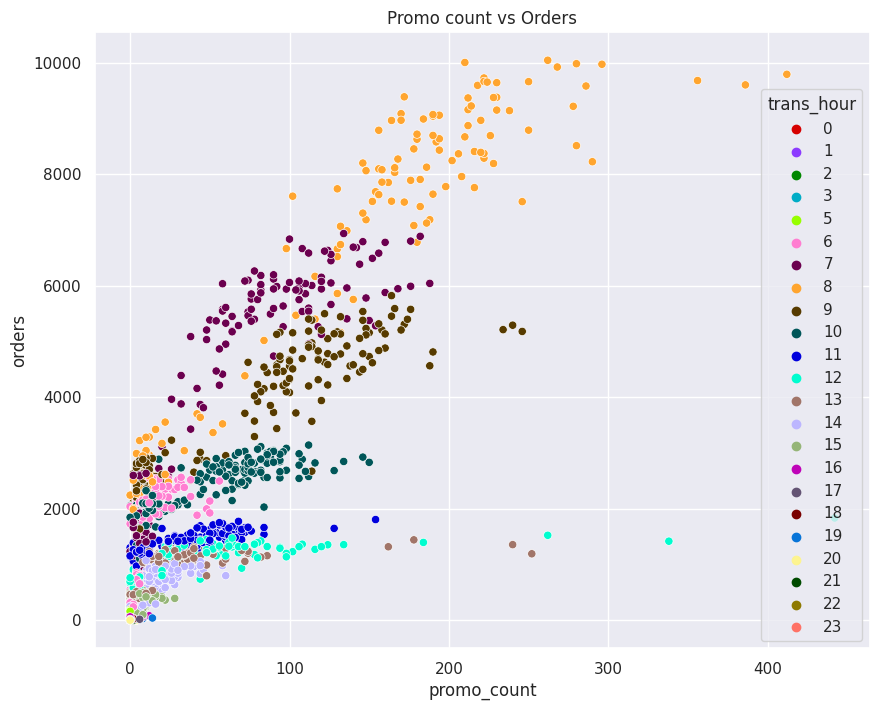

In [ ]:
sns.scatterplot(data=df, x="promo_count", y="orders", hue='trans_hour',palette=palette)
plt.title('Promo count vs Orders')
plt.show()

<ipython-input-37-3918542fe151>:1: UserWarning: The palette list has more values (25) than needed (23), which may not be intended.
  sns.scatterplot(data=df, x="promo_count", y="amount", hue='trans_hour',palette=palette)


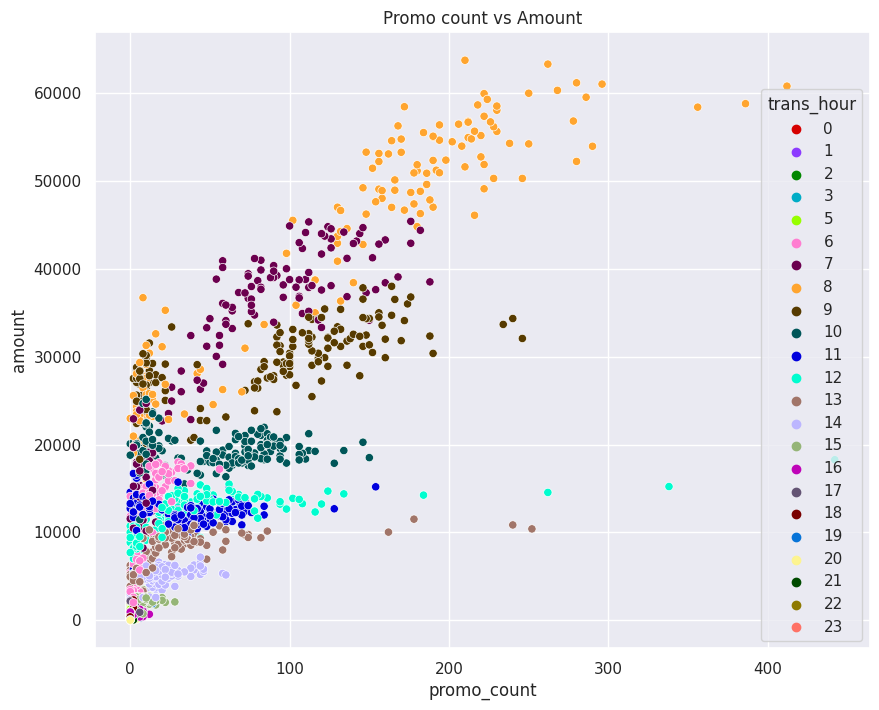

In [ ]:
sns.scatterplot(data=df, x="promo_count", y="amount", hue='trans_hour',palette=palette)
plt.title('Promo count vs Amount')
plt.show()

<ipython-input-38-d1dd4b8c89e4>:1: UserWarning: The palette list has more values (25) than needed (23), which may not be intended.
  sns.scatterplot(data=df, x="promo_count", y="Blacklisted", hue='trans_hour',palette=palette)


<Axes: xlabel='promo_count', ylabel='Blacklisted'>

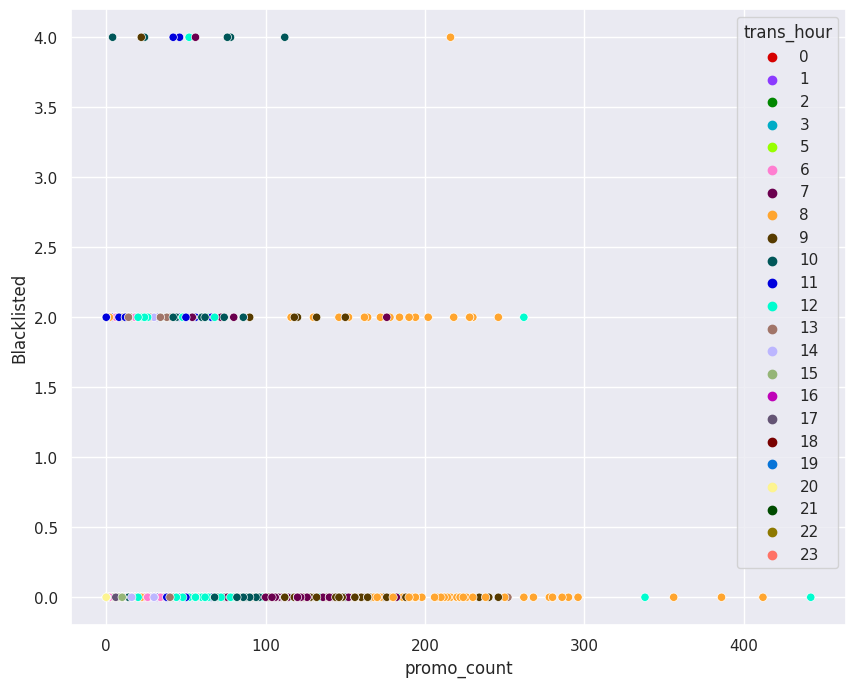

In [ ]:
sns.scatterplot(data=df, x="promo_count", y="Blacklisted", hue='trans_hour',palette=palette)

<Axes: xlabel='customers', ylabel='total_device_users'>

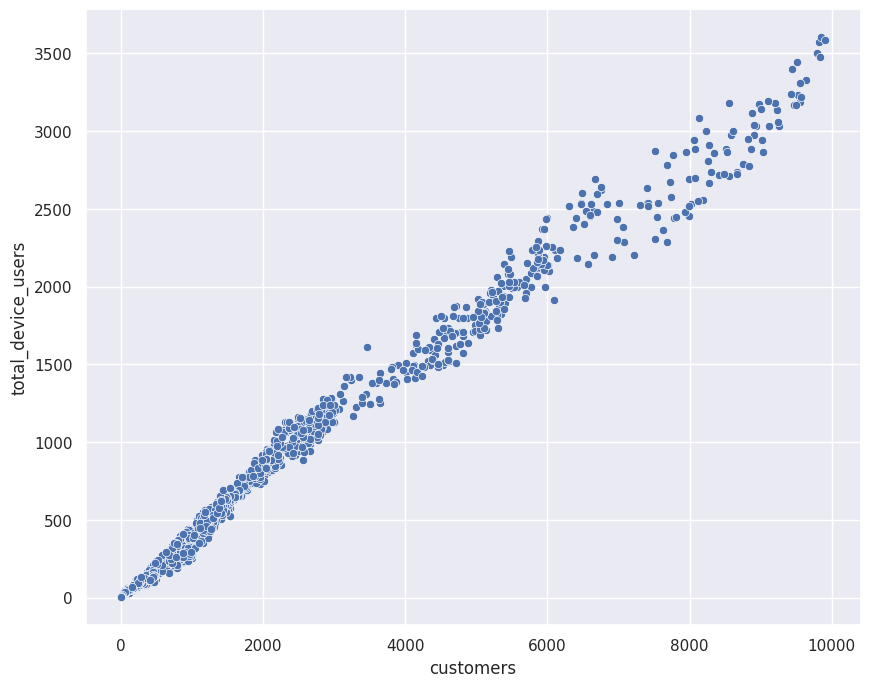

In [ ]:
df['total_device_users'] = df['Android'] + df['GCF'] + df['Macintosh'] + df['Tablet'] + df['Windows'] + df['X11'] + df['iPhone']
sns.scatterplot(data=df, x="customers", y="total_device_users")

Ask stakeholder why total device users is less than number of customers?

Clustering

Transaction days and hours are clustered here, instead of customer since dataframe is in transaction day and hour index.

In [ ]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted,weekday,is_weekend,orders_to_cust,total_device_users
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0,4,0,1.000000,24.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0,4,0,1.008065,98.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0,4,0,1.017123,216.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0,4,0,1.033079,298.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0,4,0,1.033557,304.0


In [ ]:
df['amount_per_order'] = df['amount']/df['orders']

In [ ]:
features = ['trans_hour','customers','amount_per_order','promo_count','is_weekend']
X= df[features]

X.head()

,trans_hour,customers,amount_per_order,promo_count,is_weekend
0,6,52.0,6.744231,0.0,0
1,7,248.0,9.489920,2.0,0
2,8,584.0,11.197508,4.0,0
3,9,786.0,11.515567,10.0,0
4,10,894.0,11.857489,8.0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

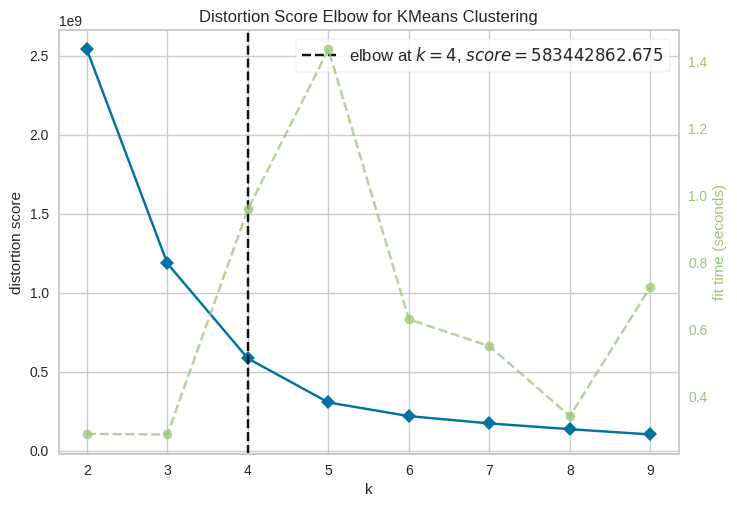

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# choose n_clusters = 4
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels']=labels

new_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,trans_hour,customers,amount_per_order,promo_count,is_weekend,labels
0,6,52.0,6.744231,0.0,0,0
1,7,248.0,9.489920,2.0,0,0
2,8,584.0,11.197508,4.0,0,0
3,9,786.0,11.515567,10.0,0,0
4,10,894.0,11.857489,8.0,0,0


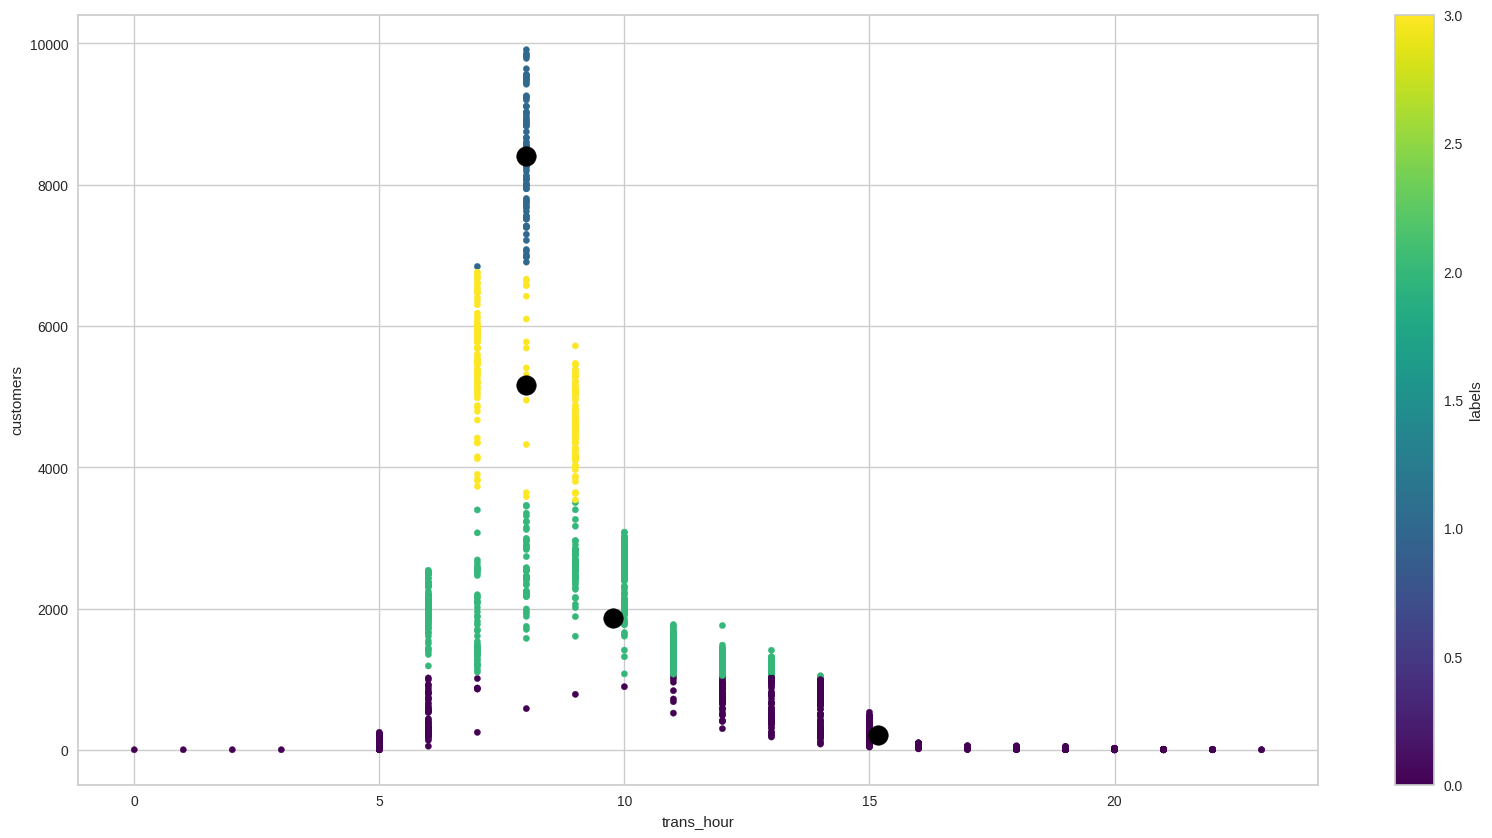

In [ ]:
# plot data points and colorize based on label
new_data.plot.scatter(x='trans_hour',
                      y = 'customers',
                      c = 'labels',
                      cmap = 'viridis',
                      figsize=(20,10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],s=200,color='black')

In [ ]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,trans_hour,customers,amount_per_order,promo_count,is_weekend,labels
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.0
mean,15.169526,206.595745,20.801325,3.687028,0.330817,0.0
std,4.547908,288.735053,18.154760,7.747088,0.470669,0.0
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,14.000000,16.000000,7.307368,0.000000,0.000000,0.0
50%,16.000000,46.000000,11.427554,0.000000,0.000000,0.0
75%,18.000000,308.000000,32.215385,4.000000,1.000000,0.0
max,23.000000,1036.000000,129.100000,72.000000,1.000000,0.0


Cluster 0: either weekdays or weekends, any time of the day, IQR spent 7-32, promos are seldom redeemed

In [ ]:
# Cluster 1
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,trans_hour,customers,amount_per_order,promo_count,is_weekend,labels
count,86.000000,86.000000,86.000000,86.000000,86.0,86.0
mean,7.988372,8408.604651,6.232730,204.139535,0.0,1.0
std,0.107833,834.967619,0.269927,53.217238,0.0,0.0
min,7.000000,6842.000000,5.854411,102.000000,0.0,1.0
25%,8.000000,7749.500000,6.047917,168.500000,0.0,1.0
50%,8.000000,8382.000000,6.169850,194.000000,0.0,1.0
75%,8.000000,9026.500000,6.321266,223.500000,0.0,1.0
max,8.000000,9910.000000,6.962703,412.000000,0.0,1.0


Cluster 1: weekdays, 8am, promos are often redeemed, IQR spend: 6usd

In [ ]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,trans_hour,customers,amount_per_order,promo_count,is_weekend,labels
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.0
mean,9.772599,1869.567797,8.729511,36.977401,0.300847,2.0
std,2.189853,620.924884,1.535943,39.016111,0.458951,0.0
min,6.000000,1038.000000,5.749050,0.000000,0.000000,2.0
25%,8.000000,1298.000000,7.294075,10.000000,0.000000,2.0
50%,10.000000,1772.000000,8.487808,28.000000,0.000000,2.0
75%,11.000000,2437.500000,10.133498,52.000000,1.000000,2.0
max,14.000000,3500.000000,12.457246,442.000000,1.000000,2.0


Cluster 2: either weekdays or weekend, 6-12, IQR spent 7-10, promos redeemed are few

In [ ]:
# Cluster 3
cluster_3= new_data[new_data['labels']==3]
cluster_3.describe()

,trans_hour,customers,amount_per_order,promo_count,is_weekend,labels
count,204.000000,204.000000,204.000000,204.000000,204.0,204.0
mean,7.995098,5160.823529,6.667170,110.862745,0.0,3.0
std,0.964889,794.035170,0.333695,38.916872,0.0,0.0
min,7.000000,3538.000000,6.111263,26.000000,0.0,3.0
25%,7.000000,4557.000000,6.415898,84.000000,0.0,3.0
50%,8.000000,5132.000000,6.570930,110.000000,0.0,3.0
75%,9.000000,5784.500000,6.891800,136.000000,0.0,3.0
max,9.000000,6758.000000,7.844261,246.000000,0.0,3.0


Cluster 3: weekdays, 7am-9am, spent 6aud, avails promos

**Clusters**

**A**

Cluster 0: either weekdays or weekends, any time of the day, IQR spent 7-32, promos are seldom redeemed

**B**

Cluster 1 and 3 are combined since both have similar behavior

Cluster 1: weekdays, 8am, promos are often redeemed, IQR spend: 6usd

Cluster 3: weekdays, 7am-9am, spent 6aud, avails promos

**C**

Cluster 2: either weekdays or weekend, 6-12, IQR spent 7-10, promos redeemed are few